# Task 4.9 Part 2

## Script Contents:

1. Import libraries
2. Create charts using sample subset
3. Create a histogram using "order_hour_of_day" column
4. Create a bar chart using "loyalty_flag" column
5. Check for a difference in expenditure depending on the hour of the day
6. Determine whether there’s a connection between age and family situation by creating a line chart
7. Explore whether there’s a connection between age and spending power by creating a scatterplot
8. Export visualizations
9. Additional visualizations for final task

## Question 1

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create a path
path = r'C:\Users\dyl41\Documents\11-14-2022 Instacart Basket Analysis'

In [3]:
#Import Project Dataset
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final3.pkl'))

In [5]:
#Expand to show all columns
pd.set_option('display.max_columns', None)

In [6]:
#Check the dataframe
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_purchase,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,prod_price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependents,martial_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Question 2

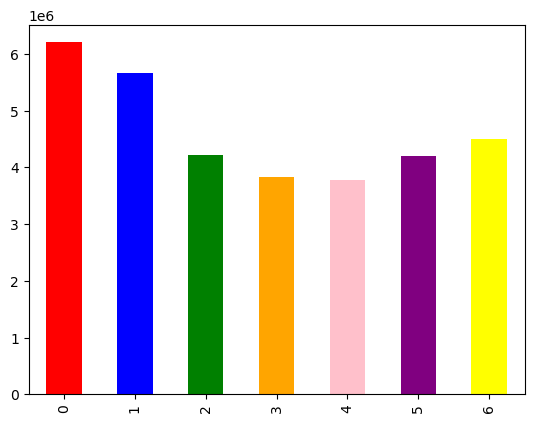

In [9]:
#Create a bar chart
bar = df_final['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'orange', 'pink', 'purple', 'yellow'])

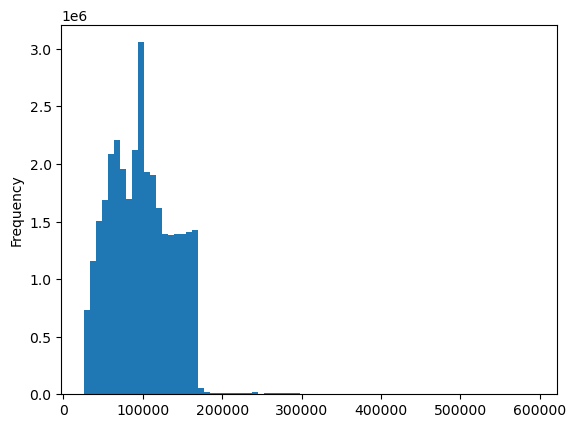

In [10]:
#Create a histogram
hist = df_final['income'].plot.hist(bins=75)

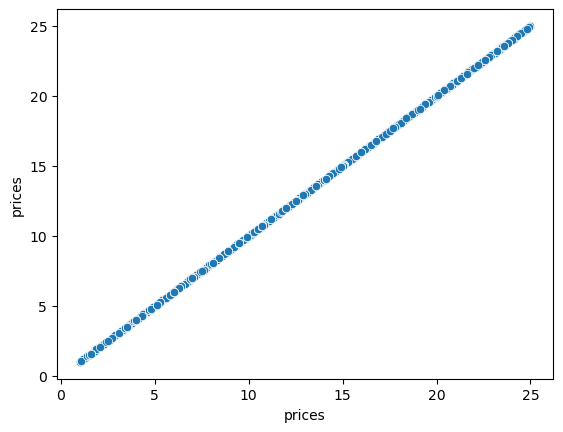

In [11]:
#Create a scatterplot
sp1 = sns.scatterplot(x = 'prices', y = 'prices',data = df_final)

In [12]:
#Create a line chart - random sampling
np.random.seed(4)

In [14]:
dev = np.random.rand(len(df_final)) <= 0.7

In [15]:
#Check dev for boolean list
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
#Break up the sample - first 70%
big = df_final[dev]

In [17]:
#Break up the sample - last 30%
small = df_final[~dev]

In [18]:
#Check using len
len(df_final)

32404859

In [19]:
#Check using the split sample
len(big) + len(small)

32404859

In [20]:
#Select the needed columns from the dataframe
df_small = small[['orders_day_of_week', 'prices']]

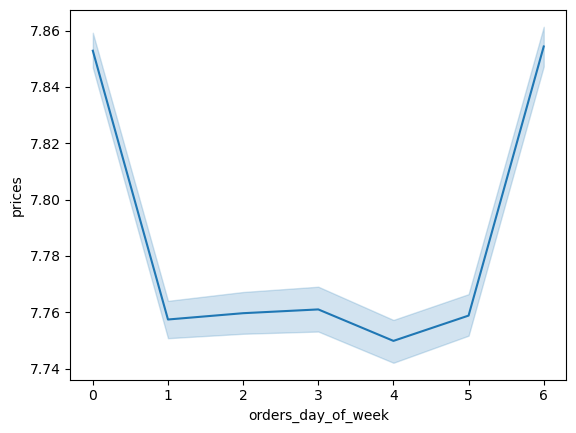

In [21]:
#Create the final line for the small set
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

## Question 3

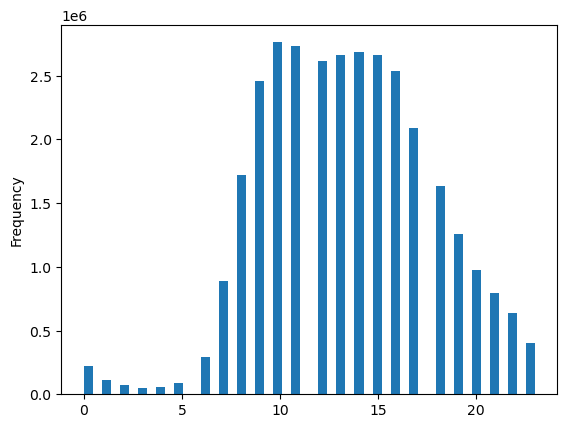

In [24]:
#Create a histogram for "order_hour_of_day"
hist2 = df_final['order_hour_of_day'].plot.hist(bins=50)

The x-axis shows the 24 hours of the day, while the y-axis shows the number of orders in the millions.

## Question 4

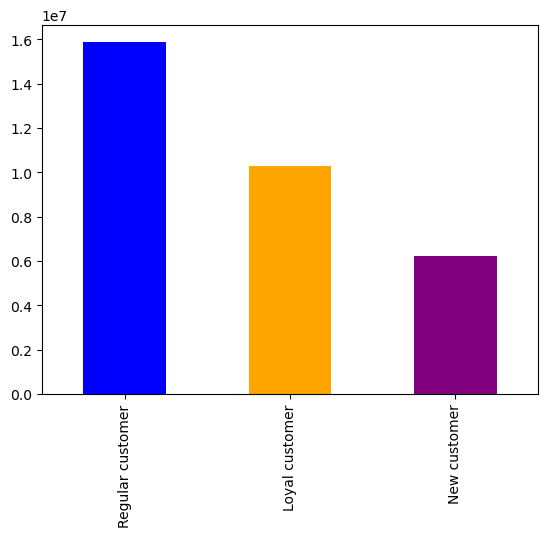

In [25]:
#Create a bar chart for the "loyalty_flag" column
bar2 = df_final['loyalty_flag'].value_counts().plot.bar(color =['blue', 'orange', 'purple'])

## Question 5

In [26]:
#Check for a difference in expenditure depending on the hour of the day
#Use the split sample from Question 2 to create a new linechart
df_small2 = small[['order_hour_of_day', 'prices']]

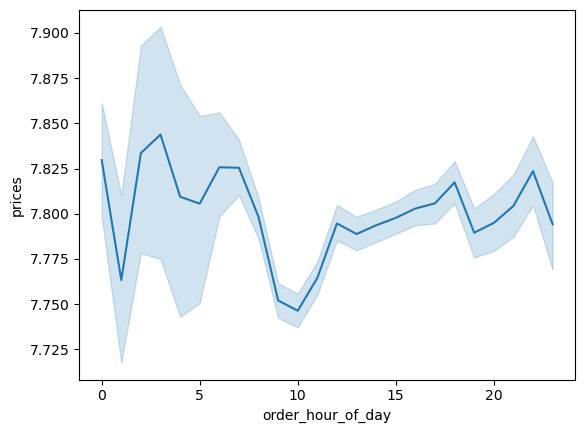

In [27]:
#Name and plot the variables on the new linechart
line2 = sns.lineplot(data = df_small2, x = 'order_hour_of_day',y = 'prices')

## Question 6

In [28]:
#Determine whether there’s a connection between age and family situation by creating a line chart
#Use the split sample from Question 2 to create a new linechart
df_small3 = small[['age', 'no_of_dependents']]

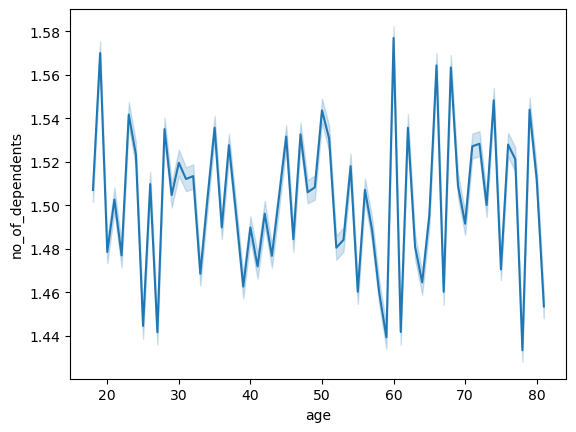

In [29]:
#Name and plot the variables on the new linechart
line3 = sns.lineplot(data = df_small3, x = 'age',y = 'no_of_dependents')

The linechart shows the number of dependents(y-axis) based on each age in the dataframe(x-axis). Around the age of 60, there are the most number of dependents, with the least around the age of 78. There is a higher degree of variability from age to age after the age of 60.

## Question 7

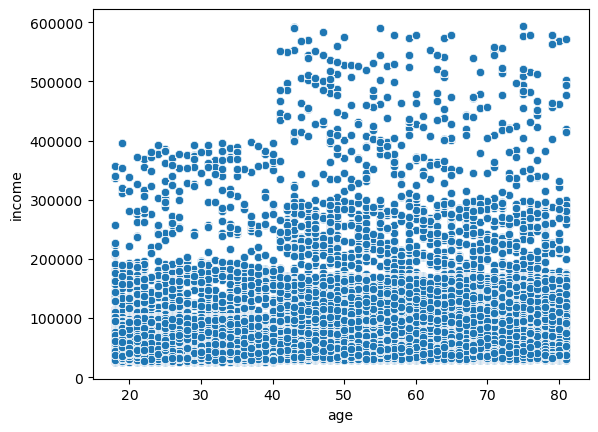

In [31]:
#Explore whether there’s a connection between age and spending power by creating a scatterplot
#Create a scatterplot
sp2 = sns.scatterplot(x = 'age', y = 'income',data = df_final)

The scatterplot shows the income(y-axis) based on the age of the customer(x-axis). Some of the key observations from this data are:



1) The majority of people from age 20-40 make below 200,000

2) The majority of people from age 40-80 also make below 200,000, but there are considerably more people making up to 300,000 than the previous age group

3) The highest earners are all over the age of 40

4) Targeted marketing campaigns should focus heavily on people over the age of 40, as they possess the greatest ability to spend

## Question 8

In [32]:
#Export the visualizations
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar1_4_9.png'))

In [33]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist1_4_9.png'))

In [34]:
sp1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sp1_4_9.png'))

In [35]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line1_4_9.png'))

In [38]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_4_9.png'))

In [39]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar2_4_9.png'))

In [40]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line2_4_9.png'))

In [41]:
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line3_4_9.png'))

In [42]:
sp2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sp2_4_9.png'))

## Extra Visualizations

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\dyl41\Documents\11-14-2022 Instacart Basket Analysis'

In [3]:
df_final2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final3.pkl'))

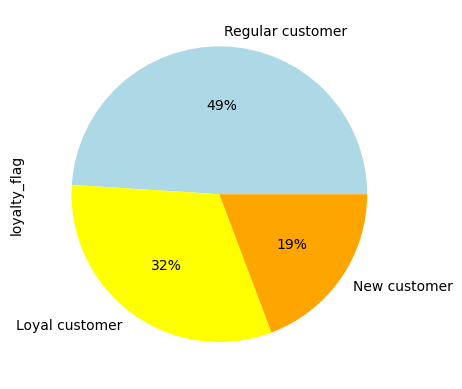

In [6]:
pie1 = df_final2['loyalty_flag'].value_counts().plot.pie(y='Loyalty Distribution', autopct=('%1.f%%'), colors=['lightblue','yellow', 'orange'])

In [7]:
pie1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty_flag.png'))